In [2]:
#hide
import pandas as pd
import numpy as np

projetos = pd.read_csv("http://dados.ufrn.br/dataset/e48162fa-0668-4098-869a-8aacfd177f9f/resource/3f12a9a4-7084-43e7-a4ac-091a8ae14020/download/projetos-de-pesquisa.csv", sep=';')
bolsistas = pd.read_csv("http://dados.ufrn.br/dataset/81608a4d-c76b-4758-a8d8-54be32209833/resource/d21c94fe-22ba-4cf3-89db-54d8e739c567/download/bolsas-iniciacao-cientifica.csv", sep=';')

In [3]:
#hide
projetos.columns

Index(['id_projeto_pesquisa', 'codigo_projeto', 'titulo', 'palavras_chave',
       'id_projeto', 'ano', 'data_inicio', 'data_fim', 'situacao',
       'tipo_projeto', 'categoria_projeto', 'id_unidade', 'unidade',
       'id_coordenador', 'coordenador', 'edital', 'id_grupo_pesquisa',
       'grupo_pesquisa', 'linha_pesquisa', 'area_conhecimento_cnpq',
       'objetivos_desenvolvimento_sustentavel'],
      dtype='object')

In [4]:
#hide
bolsistas.columns

Index(['id_discente', 'matricula', 'discente', 'titulo', 'codigo_projeto',
       'id_projeto_pesquisa', 'ano', 'id_orientador', 'orientador',
       'categoria', 'tipo_de_bolsa', 'linha_pesquisa', 'id_grupo_pesquisa',
       'grupo_pesquisa', 'cota', 'inicio', 'fim', 'id_unidade', 'unidade',
       'status'],
      dtype='object')

Tamanho das bases:

In [5]:
#hide
print(projetos.shape)
print(bolsistas.shape)

(21369, 21)
(26727, 20)


Tipos das colunas:

In [6]:
#hide
projetos.dtypes

id_projeto_pesquisa                        int64
codigo_projeto                            object
titulo                                    object
palavras_chave                            object
id_projeto                                 int64
ano                                        int64
data_inicio                               object
data_fim                                  object
situacao                                  object
tipo_projeto                              object
categoria_projeto                         object
id_unidade                                 int64
unidade                                   object
id_coordenador                           float64
coordenador                               object
edital                                    object
id_grupo_pesquisa                        float64
grupo_pesquisa                            object
linha_pesquisa                            object
area_conhecimento_cnpq                    object
objetivos_desenvolvi

In [7]:
#hide
bolsistas.dtypes

id_discente              int64
matricula                int64
discente                object
titulo                  object
codigo_projeto          object
id_projeto_pesquisa      int64
ano                      int64
id_orientador            int64
orientador              object
categoria               object
tipo_de_bolsa           object
linha_pesquisa          object
id_grupo_pesquisa      float64
grupo_pesquisa          object
cota                    object
inicio                  object
fim                     object
id_unidade               int64
unidade                 object
status                  object
dtype: object

Dados faltando por tabela:

In [8]:
#hide
print("Tabela de projetos de pesquisa\n", projetos.isna().sum(), "\n")
print("Tabela de bolsistas\n",bolsistas.isna().sum())

Tabela de projetos de pesquisa
 id_projeto_pesquisa                          0
codigo_projeto                               0
titulo                                       0
palavras_chave                             252
id_projeto                                   0
ano                                          0
data_inicio                                 31
data_fim                                   260
situacao                                     0
tipo_projeto                                 0
categoria_projeto                            0
id_unidade                                   0
unidade                                      0
id_coordenador                           21300
coordenador                              21300
edital                                   13164
id_grupo_pesquisa                         3700
grupo_pesquisa                            3738
linha_pesquisa                             658
area_conhecimento_cnpq                     411
objetivos_desenvolvimento_su

In [10]:
#hide
bolsistas_categoria = bolsistas.groupby('categoria', as_index=False).agg({"discente": "count"})
bolsistas_categoria

,categoria,discente
0,Iniciação Científica (IC),25325
1,Iniciação Tecnológica (IT),1402


In [11]:
#hide
bolsistas_tipo = bolsistas.groupby('tipo_de_bolsa', as_index=False).agg({"discente" : "count"})
bolsistas_tipo

,tipo_de_bolsa,discente
0,BALCÃO,274
1,Balcão (IC),1
2,Bolsas de IC/IT -PICME,5
3,DINTER,1
4,ECT,2
5,FUNTTEL,8
6,IC-FAPERN,4
7,JOVENS TALENTOS,467
8,NUPLAM,93
9,OUTROS,228


In [40]:
#hide
bolsistas_status = bolsistas.groupby('status', as_index=False).agg({"codigo_projeto": "count"})
bolsistas_status

,status,codigo_projeto
0,FINALIZADO,24207
1,PENDENTE DE RELATORIO,2520


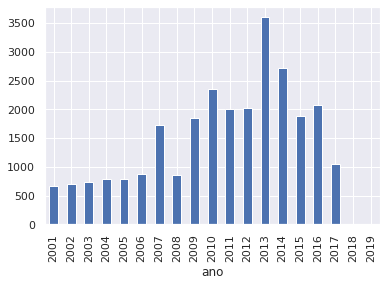

In [41]:
#hide
bolsistas.groupby('ano').discente.count().plot(kind='bar')

In [42]:
#hide
bolsistas_ano = bolsistas.groupby('ano', as_index=False).agg({"discente": "count"})
bolsistas_ano

,ano,discente
0,2001,662
1,2002,704
2,2003,735
3,2004,788
4,2005,789
5,2006,883
6,2007,1736
7,2008,851
8,2009,1853
9,2010,2349


In [43]:
#hide
grupo_projetos = bolsistas.groupby("id_projeto_pesquisa")
grupo_projetos 

In [44]:
#hide
df_projetos = projetos.drop(columns= ['id_coordenador', 'coordenador', 'edital', 'objetivos_desenvolvimento_sustentavel'])
df_projetos.columns

Index(['id_projeto_pesquisa', 'codigo_projeto', 'titulo', 'palavras_chave',
       'id_projeto', 'ano', 'data_inicio', 'data_fim', 'situacao',
       'tipo_projeto', 'categoria_projeto', 'id_unidade', 'unidade',
       'id_grupo_pesquisa', 'grupo_pesquisa', 'linha_pesquisa',
       'area_conhecimento_cnpq'],
      dtype='object')

In [46]:
#hide
projetos_situacao = projetos.groupby('situacao', as_index=False).agg({"codigo_projeto":"count"})
projetos_categoria = projetos.groupby('categoria_projeto', as_index=False).agg({"codigo_projeto":"count"})
projetos_unidades = projetos.groupby('unidade', as_index=False).agg({"codigo_projeto":"count"})

# Mineração de Dados - Visão Geral dos Projetos de Pesquisa na UFRN 

In [47]:
#hide
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [67]:
#hide
import cufflinks as cf

In [68]:
#hide
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [69]:
#hide
anos_projetos = projetos['ano'].unique()
qtd_projetos = projetos['ano'].value_counts().to_list()

In [70]:
#hide_input
trace = go.Bar( x = anos_projetos,
                y = qtd_projetos,
                marker = dict(color = 'rgba(50, 75, 150, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

data = [trace]
layout = go.Layout(title='Quantidade de Projetos por Ano',
                   yaxis={'title':'Quantidade de Projetos'},
                   xaxis={'title': 'Ano'})
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [71]:
#hide_input
trace = go.Bar( x = bolsistas_ano.ano,
                y = bolsistas_ano.discente,
                marker = dict(color = 'rgba(50, 100, 50, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

data = [trace]
layout = go.Layout(title='Quantidade de Bolsistas por Ano',
                   yaxis={'title':'Quantidade de Bolsistas'},
                   xaxis={'title': 'Ano'})
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [72]:
#hide_input
fig = px.pie(bolsistas_categoria, values='discente', names='categoria', title='Quantidade de Bolsistas por Categorias')
fig.show()

In [73]:
#hide_input
labels = bolsistas_categoria['categoria'].to_list()
values = bolsistas_categoria['discente'].to_list()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.2])])
fig.show()

In [74]:
#hide_input
colors = ['dodgerblue', 'azure']
fig = px.pie(bolsistas_categoria, values='discente', names='categoria', title='Quantidade de Bolsistas por Categoria')
fig.update_traces(textfont_size=13, marker=dict(colors=colors, line=dict(color='#000000', width=1.1)))
fig.show()

In [56]:
#hide_input
fig = px.pie(bolsistas_tipo, values='discente', names='tipo_de_bolsa', title='Quantidade de Bolsistas por Tipo de Bolsa')
fig.show()

In [57]:
#hide_input
fig = px.pie(bolsistas_tipo, values='discente', names='tipo_de_bolsa',
             title='Quantidade de Bolsistas por Tipo de Bolsa')
fig.update_traces(textposition='inside')
fig.show()

In [58]:
#hide
bolsistas_status

,status,codigo_projeto
0,FINALIZADO,24207
1,PENDENTE DE RELATORIO,2520


In [59]:
#hide_input
labels = bolsistas_status['status'].to_list()
values = bolsistas_status['codigo_projeto'].to_list()
blue_colors =  ['rgb(33, 75, 99)', 'rgb(79, 129, 102)', 'rgb(151, 179, 100)',
                 'rgb(175, 49, 35)', 'rgb(36, 73, 147)']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.2], marker_colors=blue_colors)])
fig.update(layout_title_text='Quantidade de Projetos por Status')
fig.show()

In [60]:
#hide
projetos_situacao

,situacao,codigo_projeto
0,EM EXECUÇÃO,4367
1,FINALIZADO,9416
2,RENOVADO,7586


In [61]:
#hide
projetos_unidades

,unidade,codigo_projeto
0,0576/2011 - AÇÕES DE ALIMENTAÇÃO E NUTRIÇÃO NA...,3
1,ADMINISTRAÇÃO DO CB,1
2,ADMINISTRAÇÃO DO CCET,4
3,AGÊNCIA DE INOVAÇÃO - AGIR,4
4,BIBLIOTECA CENTRAL ZILA MAMEDE,4
...,...,...
257,SESU MUSEU DE CIÊNCIAS MORFOLÓGICAS,1
258,SESU TRILHANDO O SABER CIENTÍFICO,9
259,SUPERINTENDENCIA DE COMUNICACAO,4
260,UNIDADE ACADEMICA ESPECIALIZADA EM CIENCIAS AG...,7


In [62]:
#hide
projetos_unidades.sort_values(by=['codigo_projeto'], inplace=True, ascending=False)

In [63]:
#hide
principais_unidades = projetos_unidades[(projetos_unidades['codigo_projeto'] > 500)]
principais_unidades

,unidade,codigo_projeto
14,CENTRO DE CIÊNCIAS DA SAÚDE,1319
81,CT VICE-DIRETORIA,1240
16,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",1080
15,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,1058
13,CENTRO DE BIOCIÊNCIAS,934
17,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,812
167,ESCOLA AGRÍCOLA DE JUNDIAÍ,578
168,ESCOLA DE CIÊNCIAS E TECNOLOGIA,553
150,DEPARTAMENTO DE ODONTOLOGIA,534


In [64]:
fig = px.scatter(principais_unidades, x="unidade", y="codigo_projeto", 
                 color="unidade", 
                 size='codigo_projeto') 
  
fig.show()

In [76]:
#hide_input
plot = go.Figure(data=[go.Scatter( 
    x = principais_unidades['unidade'].to_list(), 
    y = principais_unidades['codigo_projeto'].to_list(), 
    mode = 'markers', 
     marker=dict( 
       color = [1600, 1500, 1400, 1300, 1200, 1100, 1000, 800, 600],   
       size = [90, 80, 70, 60 ,50 ,40 ,30 ,20, 10], 
       showscale=True
     ) 
)]) 
                   
plot.show()

In [66]:
#df = px.data.gapminder()
#fig = px.scatter_3d(principais_unidades, x='year', y='continent', z='pop', size='gdpPercap', color='lifeExp',
#                    hover_data=['country'])
#fig.update_layout(scene_zaxis_type="log")
#fig.show()